In [1]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00


In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [3]:
#importing the data
data = pd.read_csv('/content/energy_demand (1).csv')

In [4]:
#display the data
data

,Date,energydemand,min temparature,max temparature
0,2020-04-01,8321,24.26,37.64
1,2020-04-02,8479,25.49,38.13
2,2020-04-03,8424,25.47,37.71
3,2020-04-04,8222,24.78,36.86
4,2020-04-05,8189,25.33,36.31
...,...,...,...,...
1090,2018-03-27,8853,24.26,35.00
1091,2018-03-28,8844,24.79,35.68
1092,2018-03-29,8907,26.19,36.25
1093,2018-03-30,8852,26.18,36.30


In [5]:
#displaying the dimensions of the data
data.shape

(1095, 4)

In [6]:
#datatypes of all the columns
data.dtypes

Date                object
energydemand         int64
min temparature    float64
max temparature    float64
dtype: object

In [7]:
#Info(nonnull count, dataypes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1095 non-null   object 
 1   energydemand     1095 non-null   int64  
 2   min temparature  1095 non-null   float64
 3   max temparature  1095 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 34.3+ KB


In [8]:
#getting the not null count of all columns using isna()
data.isna().sum()

Date               0
energydemand       0
min temparature    0
max temparature    0
dtype: int64

We can see there is not a single null value in the data

In [9]:
data = data.sort_values(by = 'Date')

In [10]:
#Converting the Date column's dataype from object to datetime and making it the index
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.set_index('Date', inplace=True)

In [11]:
data.dtypes

energydemand         int64
min temparature    float64
max temparature    float64
dtype: object

In [12]:
data.shape

(1095, 3)

<Axes: xlabel='Date'>

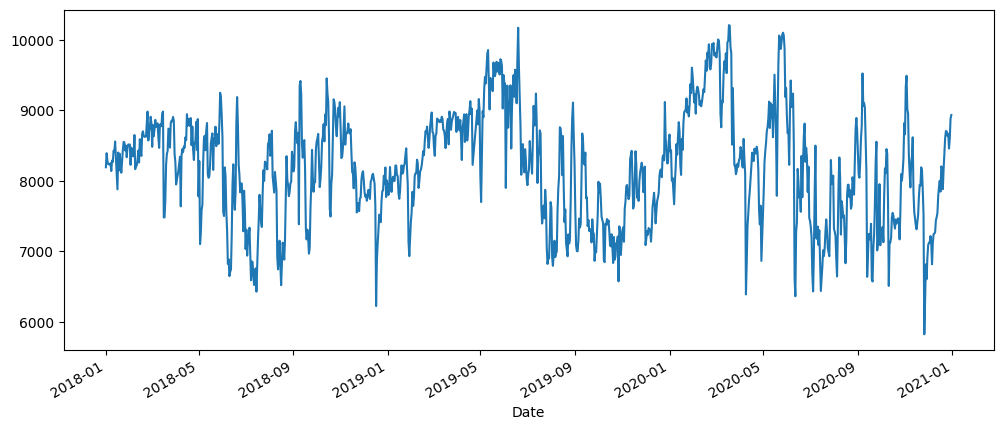

In [13]:
#plot the data
data['energydemand'].plot(figsize=(12,5))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

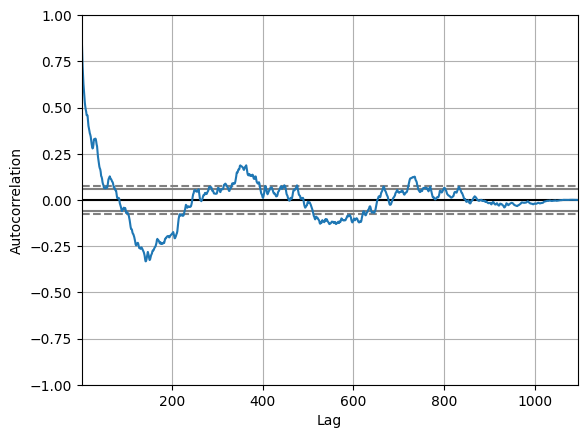

In [14]:
#plotting the autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['energydemand'])

As we can see, the data exhibits a damped but not so perfect sinusoidal wave like graph

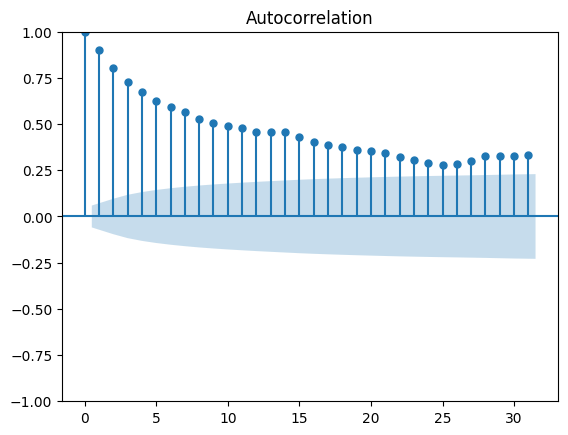

In [15]:
#plotting the acf graph
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['energydemand'])
plt.show()

ACF plots show the correlation between a time series and a lagged version of itself. Here, ACF graph is decreasing.

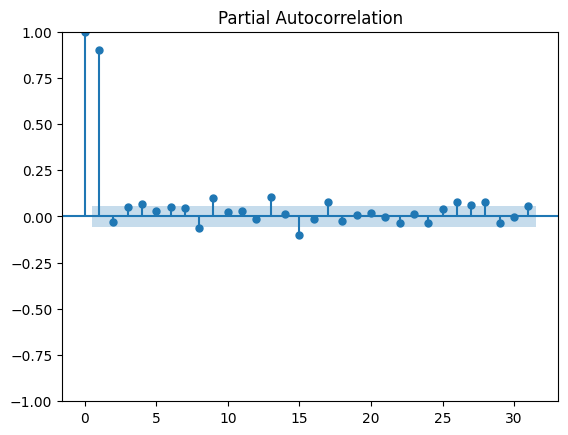

In [16]:
#PACF PLOT
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data['energydemand'])
plt.show()

PACF plots show the correlation between a time series and a lagged version of itself after removing the effects of intervening observations. The PACF graph is abrupt.

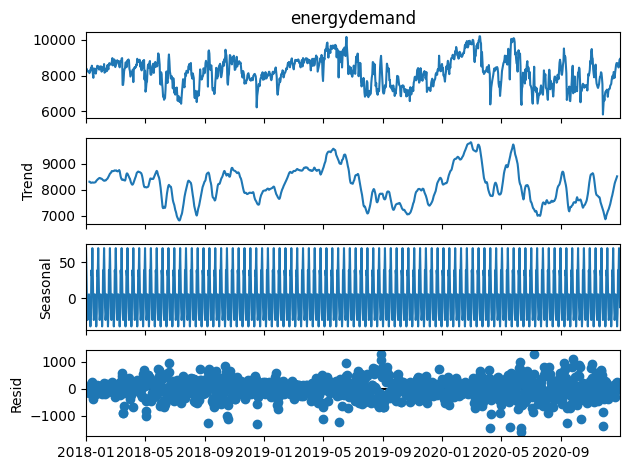

In [17]:
#Data decompostion
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data['energydemand'],model='additive',period=12)
decomposition.plot()
plt.show()

checking for stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF: ", dftest[0])
    print("2. p-value: ", dftest[1])
    print("3. Num of Lags: ", dftest[2])
    print ("4. Num of observations used for ADF  Regression and Critical values calculation :",dftest[3])
    print(" 5. Critical values: ")
    for key,val in dftest[4].items():
        print("\t", key, ": ", val)



In [19]:
ad_test(data['energydemand'])

1. ADF:  -4.031030694195065
2. p-value:  0.0012564635733798633
3. Num of Lags:  16
4. Num of observations used for ADF  Regression and Critical values calculation : 1078
 5. Critical values: 
	 1% :  -3.4364306491488814
	 5% :  -2.8642248442477976
	 10% :  -2.5681995044075987


As the pvalue is less than 0.05, data is not non-stationary so no need for transformation techniques

In [20]:
from pmdarima import auto_arima
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [21]:
stepwise_fit = auto_arima(data['energydemand'],start_p=0,start_q=0,test='adf',m=12,seasonal=True,trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=3.97 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=17703.088, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=15885.350, Time=2.85 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=16696.336, Time=2.50 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=22853.515, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=15887.893, Time=0.10 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=15886.843, Time=21.97 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=15887.323, Time=5.92 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=15885.403, Time=0.55 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=15894.590, Time=15.81 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=17703.003, Time=0.71 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=15886.513, Time=3.43 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=15886.775, Time=3.70 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=16679.369, Time=7.48 sec
 ARIMA(2,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1095
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -7938.675
Date:                            Thu, 16 May 2024   AIC                          15885.350
Time:                                    18:24:30   BIC                          15905.345
Sample:                                         0   HQIC                         15892.916
                                           - 1095                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    816.4443    122.043      6.690      0.000     577.245    1055.644
ar.L1          0.9066      0.014     64.516      0.000       0.879       0.934
ar.S.L12      -0.0662      0.033     -1.979      0.048      -0.132      -0.001
sigma2      1.167e+05   3029.386     38.526      0.000    1.11e+05    1.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):              1108.59
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.41   Skew:                            -0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#splitting data into training and testing

In [22]:
print(data.shape)

(1095, 3)


In [23]:
train_size = int(len(data) * 0.80)
train = data[:train_size]
test = data[train_size:]

print("Shape of training set:", train.shape)
print("Shape of testing/validation set:", test.shape)

Shape of training set: (876, 3)
Shape of testing/validation set: (219, 3)


# IMPLEMENTING SARIMA MODEL

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [25]:
#training the sarima model
order=(1,0,0)
seasonal_order =(1,0,0,12)
model_sar = SARIMAX(train['energydemand'],order = order, seasonal_order = seasonal_order)
sarima_model = model_sar.fit()

In [26]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       energydemand   No. Observations:                  876
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood               -6316.914
Date:                            Thu, 16 May 2024   AIC                          12639.827
Time:                                    18:25:16   BIC                          12654.153
Sample:                                         0   HQIC                         12645.307
                                            - 876                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.001    826.715      0.000       0.997       1.002
ar.S.L12      -0.0866      0.037     -2.316      0.021      -0.160      -0.013
sigma2      1.066e+05   2939.867     36.250      0.000    1.01e+05    1.12e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.32   Jarque-Bera (JB):               773.64
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.61
Prob(H) (two-sided):                  0.32   Kurtosis:                         7.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Testing  with sarima

In [27]:
start = len(train)
end = len(train) + len(test) - 1  # Adjusted end index

# Make predictions
pred_s = sarima_model.predict(start=start, end=end, type='levels')
pred_s.index = data.index[start:end + 1]  # Adjusted index for prediction

<Axes: xlabel='Date'>

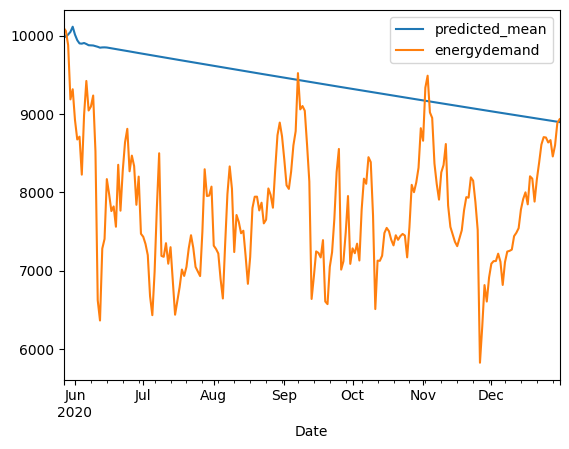

In [28]:
pred_s.plot(legend=True)
test['energydemand'].plot(legend=True)

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred_s,test['energydemand']))
print(rmse)

1794.165151341234


In [30]:
test['energydemand'].mean()

7805.780821917808

# Predictions on the next 30 days using Sarima

In [31]:
index_future_dates = pd.date_range(start='2021-01-01', end='2021-01-30')
pred_new_s = sarima_model.predict(start=len(data),end =len(data)+29,typ='levels').rename('SARIMA Predictions')
pred_new_s.index = index_future_dates
print(pred_new_s)

2021-01-01    8893.511849
2021-01-02    8888.973439
2021-01-03    8884.437346
2021-01-04    8879.903567
2021-01-05    8875.372102
2021-01-06    8870.842950
2021-01-07    8866.316108
2021-01-08    8861.791577
2021-01-09    8857.269355
2021-01-10    8852.749440
2021-01-11    8848.231832
2021-01-12    8843.716529
2021-01-13    8839.203530
2021-01-14    8834.692835
2021-01-15    8830.184441
2021-01-16    8825.678348
2021-01-17    8821.174554
2021-01-18    8816.673059
2021-01-19    8812.173861
2021-01-20    8807.676959
2021-01-21    8803.182351
2021-01-22    8798.690038
2021-01-23    8794.200016
2021-01-24    8789.712286
2021-01-25    8785.226846
2021-01-26    8780.743695
2021-01-27    8776.262832
2021-01-28    8771.784256
2021-01-29    8767.307964
2021-01-30    8762.833957
Freq: D, Name: SARIMA Predictions, dtype: float64


plotting the 30 day predictions

<Axes: >

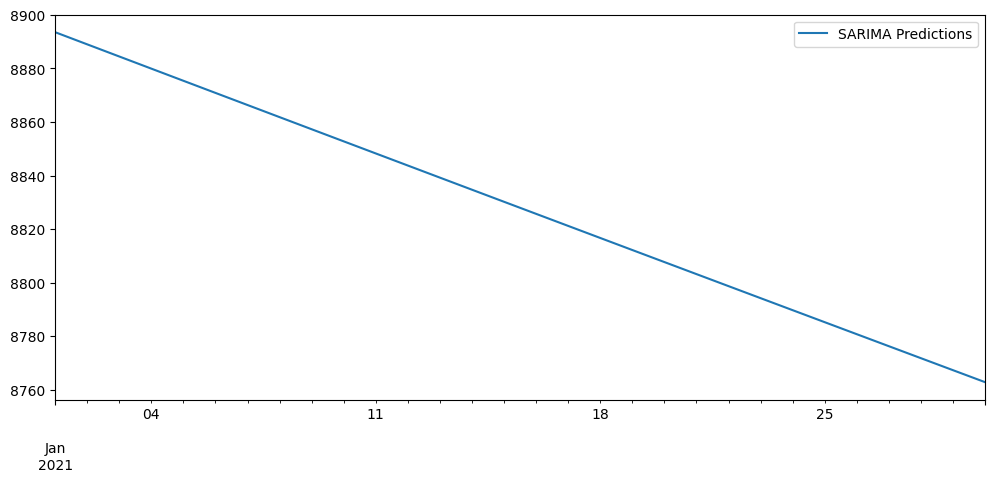

In [32]:
#plotting the predictions
pred_new_s.plot(figsize=(12,5),legend=True)

PLOTTING THE ORIGINAL DATA AND PREDICTIONS FOR THE NEXT 30 DAYS

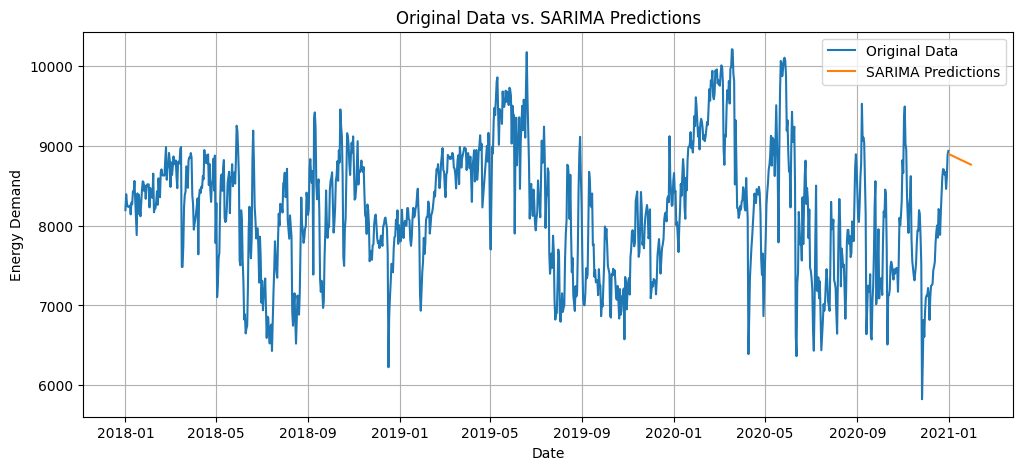

In [33]:
#Plotting original data
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['energydemand'], label='Original Data')

#Plotting SARIMA predictions
plt.plot(pred_new_s.index, pred_new_s, label='SARIMA Predictions')

#labels and legend
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.title('Original Data vs. SARIMA Predictions')
plt.legend()
plt.grid(True)
plt.show()

Ploting SARIMA FORECASTED(next 30 days) VS ORIGINAL DATA PLOT(past 30 days)

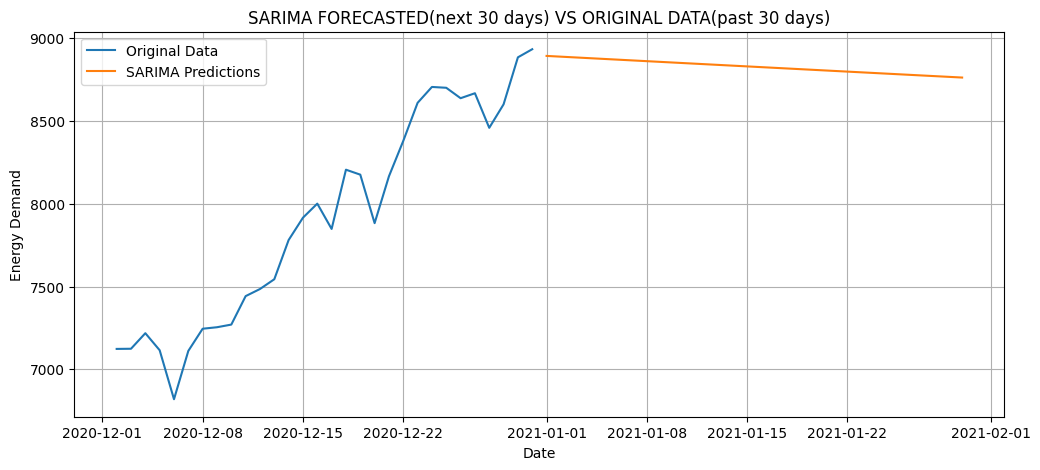

In [34]:
#Plotting original data
plt.figure(figsize=(12, 5))
sorted_data = data.sort_index()
last_30days = sorted_data.iloc[-30:]
plt.plot(last_30days.index, last_30days['energydemand'], label='Original Data')

#Plotting SARIMA predictions
plt.plot(pred_new_s.index, pred_new_s, label='SARIMA Predictions')

#labels and legend
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.title('SARIMA FORECASTED(next 30 days) VS ORIGINAL DATA(past 30 days)')
plt.legend()
plt.grid(True)
plt.show()

Plotting original data with SARIMA PREDICTIONS with COnfidence bounds

In [35]:
# Calculate standard error of forecast
residuals = sarima_model.resid
se = np.sqrt(np.mean(residuals**2))

# Calculate confidence intervals
z = 1.96  # 95% confidence interval
pred_new_s_lower = pred_new_s - z * se
pred_new_s_upper = pred_new_s + z * se
print(pred_new_s_lower)
print(pred_new_s_upper)

2021-01-01    8054.818040
2021-01-02    8050.279631
2021-01-03    8045.743537
2021-01-04    8041.209759
2021-01-05    8036.678294
2021-01-06    8032.149141
2021-01-07    8027.622300
2021-01-08    8023.097768
2021-01-09    8018.575546
2021-01-10    8014.055631
2021-01-11    8009.538023
2021-01-12    8005.022720
2021-01-13    8000.509722
2021-01-14    7995.999026
2021-01-15    7991.490632
2021-01-16    7986.984539
2021-01-17    7982.480746
2021-01-18    7977.979250
2021-01-19    7973.480052
2021-01-20    7968.983150
2021-01-21    7964.488543
2021-01-22    7959.996229
2021-01-23    7955.506208
2021-01-24    7951.018478
2021-01-25    7946.533038
2021-01-26    7942.049887
2021-01-27    7937.569023
2021-01-28    7933.090447
2021-01-29    7928.614156
2021-01-30    7924.140149
Freq: D, Name: SARIMA Predictions, dtype: float64
2021-01-01    9732.205658
2021-01-02    9727.667248
2021-01-03    9723.131155
2021-01-04    9718.597376
2021-01-05    9714.065911
2021-01-06    9709.536758
2021-01-07    

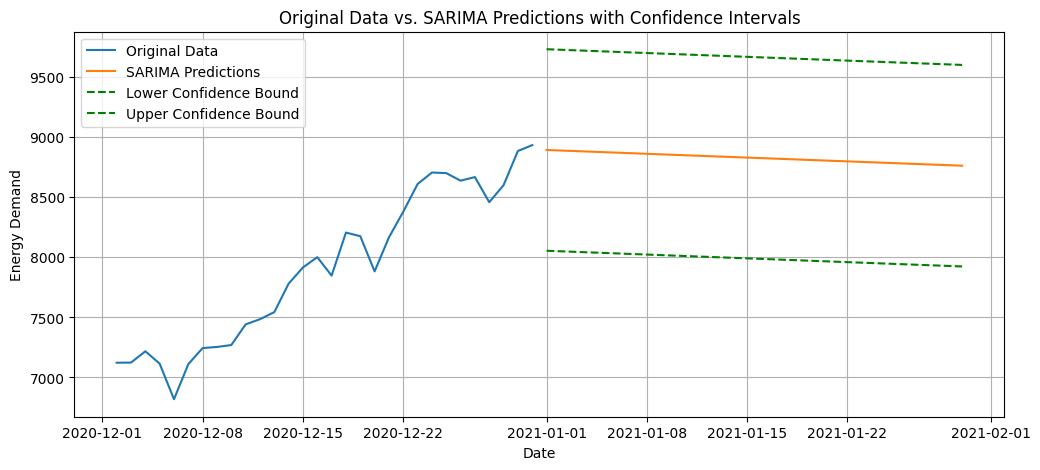

In [36]:
# Plotting original data
plt.figure(figsize=(12, 5))
sorted_data = data.sort_index()
last_30days = sorted_data.iloc[-30:]
plt.plot(last_30days.index, last_30days['energydemand'], label='Original Data')

# Plotting SARIMA predictions
plt.plot(pred_new_s.index, pred_new_s, label='SARIMA Predictions')

plt.plot(pred_new_s.index, pred_new_s_lower, color='green', linestyle='--', label='Lower Confidence Bound')
plt.plot(pred_new_s.index, pred_new_s_upper, color='green', linestyle='--', label='Upper Confidence Bound')

# Labels and legend
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.title('Original Data vs. SARIMA Predictions with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

SAVING THE PREDICTIONS TO CSV

In [38]:
#saving the sarima predictions to a csv file
pred_new_s.to_excel('predictions_sarima_final.xlsx',index='True')